# Pokemon Statistical Analysis

The purpose of this project is to experiment with some Exploratory data analysis with some Pokèmon statistics.
In this notebook I will frequently use the abbreviation "gen" when referring to "generation".

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

## Read In Data


In [2]:
poke_df = pd.read_csv('./data/pokemon.csv')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
poke_df.describe

<bound method NDFrame.describe of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     

In [4]:
poke_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## Exploratory Data Analysis (EDA) For Each Generation

### Gen 1 Charts

In [5]:
gen_1 = poke_df.query('Generation==1')
gen_1.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
gen_1_means = gen_1.groupby('Type 1').mean(numeric_only=True)
gen_1_means.drop(columns=['#', 'Generation', 'Legendary'], inplace=True)
gen_1_means.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,366.428571,56.785714,76.428571,60.357143,46.428571,59.642857,66.785714
Dragon,440.000000,64.333333,94.000000,68.333333,73.333333,73.333333,66.666667
Electric,444.444444,54.444444,62.000000,64.666667,91.111111,73.333333,98.888889
Fairy,403.000000,82.500000,57.500000,60.500000,77.500000,77.500000,47.500000
Fighting,412.142857,63.571429,102.857143,61.000000,45.000000,73.571429,66.142857


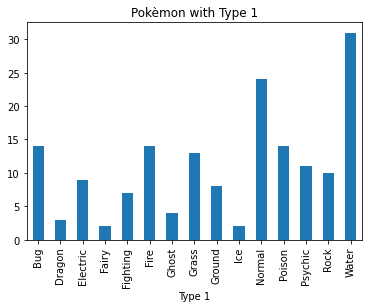

In [7]:
gen_1_counts = gen_1.groupby('Type 1').count().filter('#')
fig = gen_1_counts.plot.bar(legend=False, title='Pokèmon with Type 1').get_figure()
fig.savefig('images/gen_1/gen_1_count.jpg')

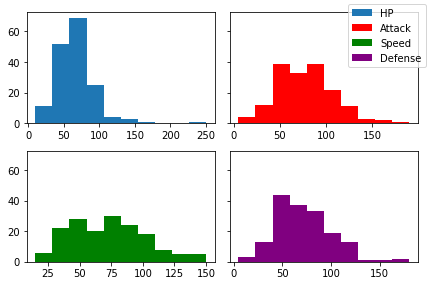

In [8]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs[0][0].hist(gen_1['HP'], label='HP')
axs[0][1].hist(gen_1['Attack'], label='Attack', color='red')
axs[1][0].hist(gen_1['Speed'], label='Speed', color='green')
axs[1][1].hist(gen_1['Defense'], label='Defense', color='purple')
fig.legend()
fig.savefig('images/gen_1/gen_1_charts.jpg')

### Gen 2 Charts

In [9]:
gen_2 = poke_df.query('Generation==2')
gen_2.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
166,152,Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False
167,153,Bayleef,Grass,NaN,405,60,62,80,63,80,60,2,False
168,154,Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False
169,155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False
170,156,Quilava,Fire,NaN,405,58,64,58,80,65,80,2,False


In [10]:
gen_2_means = gen_2.groupby('Type 1').mean(numeric_only=True)
gen_2_means.drop(columns=['#', 'Generation', 'Legendary'], inplace=True)
gen_2_means.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,428.750000,59.583333,85.416667,93.750000,47.916667,86.666667,55.416667
Dark,465.000000,67.500000,80.833333,62.833333,85.000000,77.833333,91.000000
Electric,415.714286,65.714286,64.714286,58.857143,91.428571,70.714286,64.285714
Fairy,323.600000,58.000000,57.000000,60.600000,53.000000,65.000000,30.000000
Fighting,332.500000,42.500000,65.000000,65.000000,35.000000,72.500000,52.500000


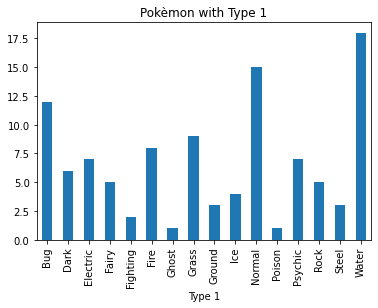

In [11]:
gen_2_counts = gen_2.groupby('Type 1').count().filter('#')
fig = gen_2_counts.plot.bar(legend=False, title='Pokèmon with Type 1').get_figure()
fig.savefig('images/gen_2/gen_2_counts.jpg')

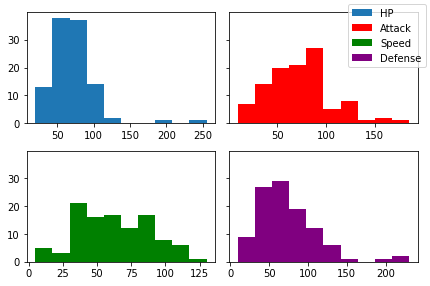

In [12]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs[0][0].hist(gen_2['HP'], label='HP')
axs[0][1].hist(gen_2['Attack'], label='Attack', color='red')
axs[1][0].hist(gen_2['Speed'], label='Speed', color='green')
axs[1][1].hist(gen_2['Defense'], label='Defense', color='purple')
fig.legend()
fig.savefig('images/gen_2/gen_2_charts.jpg')

### Gen 3 Charts

In [13]:
gen_3 = poke_df.query('Generation==3')
gen_3.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
272,252,Treecko,Grass,NaN,310,40,45,35,65,55,70,3,False
273,253,Grovyle,Grass,NaN,405,50,65,45,85,65,95,3,False
274,254,Sceptile,Grass,NaN,530,70,85,65,105,85,120,3,False
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
276,255,Torchic,Fire,NaN,310,45,60,40,70,50,45,3,False


In [14]:
gen_3_means = gen_3.groupby('Type 1').mean(numeric_only=True)
gen_3_means.drop(columns=['#', 'Generation', 'Legendary'], inplace=True)
gen_3_means.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,318.833333,49.833333,55.833333,54.083333,48.333333,51.166667,59.583333
Dark,421.666667,55.833333,97.500000,70.833333,71.666667,65.000000,60.833333
Dragon,596.666667,81.666667,113.333333,95.833333,115.000000,96.666667,94.166667
Electric,431.000000,60.000000,57.000000,54.000000,93.000000,68.000000,99.000000
Fighting,382.200000,73.200000,76.000000,61.000000,48.000000,61.000000,63.000000


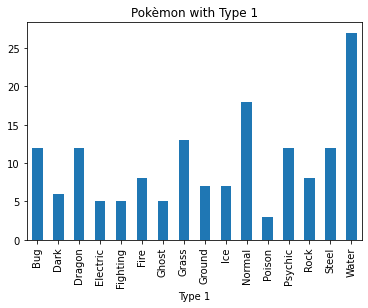

In [15]:
gen_3_counts = gen_3.groupby('Type 1').count().filter('#')
fig = gen_3_counts.plot.bar(legend=False, title='Pokèmon with Type 1').get_figure()
fig.savefig('images/gen_3/gen_3_counts.jpg')

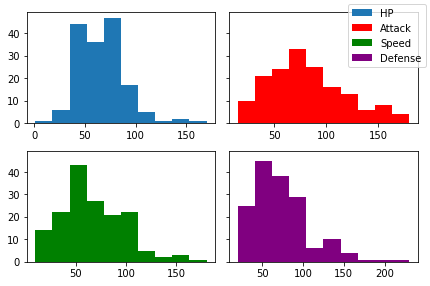

In [16]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs[0][0].hist(gen_3['HP'], label='HP')
axs[0][1].hist(gen_3['Attack'], label='Attack', color='red')
axs[1][0].hist(gen_3['Speed'], label='Speed', color='green')
axs[1][1].hist(gen_3['Defense'], label='Defense', color='purple')
fig.legend()
fig.savefig('images/gen_3/gen_3_charts.jpg')

### Gen 4 Charts

In [17]:
gen_4 = poke_df.query('Generation==4')
gen_4.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
432,387,Turtwig,Grass,NaN,318,55,68,64,45,55,31,4,False
433,388,Grotle,Grass,NaN,405,75,89,85,55,65,36,4,False
434,389,Torterra,Grass,Ground,525,95,109,105,75,85,56,4,False
435,390,Chimchar,Fire,NaN,309,44,58,44,58,44,61,4,False
436,391,Monferno,Fire,Fighting,405,64,78,52,78,52,81,4,False


In [18]:
gen_4_means = gen_4.groupby('Type 1').mean(numeric_only=True)
gen_4_means.drop(columns=['#', 'Generation', 'Legendary'], inplace=True)
gen_4_means.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,373.100000,59.0,62.600000,70.2,63.600000,67.200000,50.500000
Dark,538.333333,80.0,111.666667,69.0,95.000000,75.666667,107.000000
Dragon,502.500000,85.5,115.000000,80.0,72.500000,70.000000,79.500000
Electric,472.416667,57.5,73.583333,85.5,90.416667,86.583333,78.833333
Fairy,545.000000,85.0,50.000000,95.0,120.000000,115.000000,80.000000


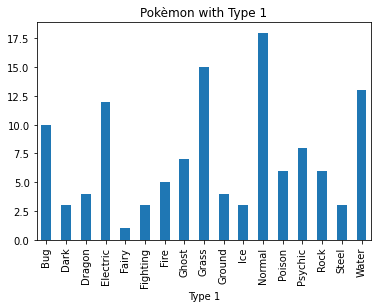

In [19]:
gen_4_counts = gen_4.groupby('Type 1').count().filter('#')
fig = gen_4_counts.plot.bar(legend=False, title='Pokèmon with Type 1').get_figure()
fig.savefig('images/gen_4/gen_4_counts.jpg')

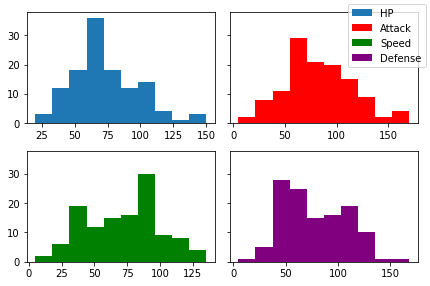

In [20]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs[0][0].hist(gen_4['HP'], label='HP')
axs[0][1].hist(gen_4['Attack'], label='Attack', color='red')
axs[1][0].hist(gen_4['Speed'], label='Speed', color='green')
axs[1][1].hist(gen_4['Defense'], label='Defense', color='purple')
fig.legend()
fig.savefig('images/gen_4/gen_4_charts.jpg')

### Gen 5 Charts

In [21]:
gen_5 = poke_df.query('Generation==5')
gen_5.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
553,494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True
554,495,Snivy,Grass,NaN,308,45,45,55,45,55,63,5,False
555,496,Servine,Grass,NaN,413,60,60,75,60,75,83,5,False
556,497,Serperior,Grass,NaN,528,75,75,95,75,95,113,5,False
557,498,Tepig,Fire,NaN,308,65,63,45,45,45,45,5,False


In [22]:
gen_5_means = gen_5.groupby('Type 1').mean(numeric_only=True)
gen_5_means.drop(columns=['#', 'Generation', 'Legendary'], inplace=True)
gen_5_means.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,416.111111,59.111111,77.611111,78.277778,62.888889,66.944444,71.277778
Dark,417.923077,63.538462,81.384615,71.692308,65.615385,65.538462,70.153846
Dragon,575.000000,93.333333,129.000000,90.000000,97.777778,83.333333,81.555556
Electric,446.875000,64.750000,88.750000,60.625000,87.500000,63.125000,82.125000
Fighting,429.285714,81.428571,108.571429,72.142857,47.142857,60.000000,60.000000


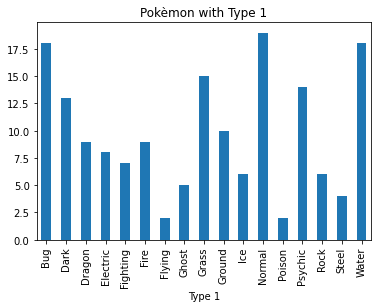

In [23]:
gen_5_counts = gen_5.groupby('Type 1').count().filter('#')
fig = gen_5_counts.plot.bar(legend=False, title='Pokèmon with Type 1').get_figure()
fig.savefig('images/gen_5/gen_5_counts.jpg')

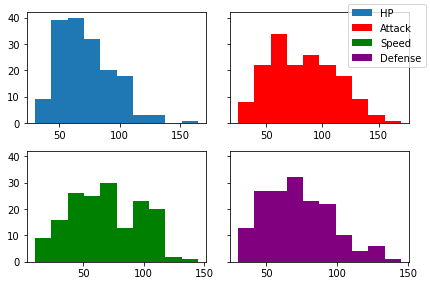

In [24]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs[0][0].hist(gen_5['HP'], label='HP')
axs[0][1].hist(gen_5['Attack'], label='Attack', color='red')
axs[1][0].hist(gen_5['Speed'], label='Speed', color='green')
axs[1][1].hist(gen_5['Defense'], label='Defense', color='purple')
fig.legend()
fig.savefig('images/gen_5/gen_5_charts.jpg')

### Gen 6 Charts

In [25]:
gen_6 = poke_df.query('Generation==6')
gen_6.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
718,650,Chespin,Grass,NaN,313,56,61,65,48,45,38,6,False
719,651,Quilladin,Grass,NaN,405,61,78,95,56,58,57,6,False
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
721,653,Fennekin,Fire,NaN,307,40,45,40,62,60,60,6,False
722,654,Braixen,Fire,NaN,409,59,59,58,90,70,73,6,False


In [26]:
gen_6_means = gen_6.groupby('Type 1').mean(numeric_only=True)
gen_6_means.drop(columns=['#', 'Generation', 'Legendary'], inplace=True)
gen_6_means.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,274.666667,54.333333,36.333333,50.000000,48.000000,35.000000,51.000000
Dark,483.333333,88.333333,92.333333,78.666667,78.666667,73.000000,72.333333
Dragon,488.000000,77.750000,81.250000,69.750000,82.250000,108.250000,68.750000
Electric,400.333333,57.666667,50.333333,47.333333,83.666667,68.000000,93.333333
Fairy,450.555556,80.000000,66.222222,66.444444,88.333333,93.888889,55.666667


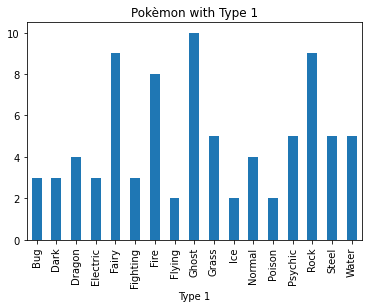

In [27]:
gen_6_counts = gen_6.groupby('Type 1').count().filter('#')
fig = gen_6_counts.plot.bar(legend=False, title='Pokèmon with Type 1').get_figure()
fig.savefig('images/gen_6/gen_6_counts.jpg')

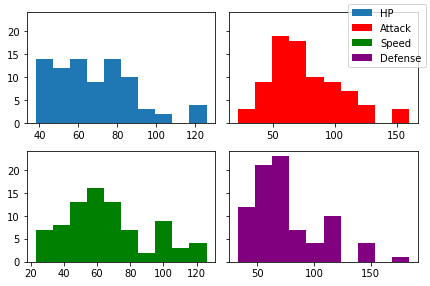

In [28]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs[0][0].hist(gen_6['HP'], label='HP')
axs[0][1].hist(gen_6['Attack'], label='Attack', color='red')
axs[1][0].hist(gen_6['Speed'], label='Speed', color='green')
axs[1][1].hist(gen_6['Defense'], label='Defense', color='purple')
fig.legend()
fig.savefig('images/gen_6/gen_6_charts.jpg')

## EDA Cross Generation

For this section each generation has its own color.

| Color | Generation |
---------- | --------
Blue | Gen 1 |
Gold | Gen 2 |
Orange | Gen 3 |
Purple | Gen 4 |
Grey | Gen 5 |
Cyan | Gen 6 |

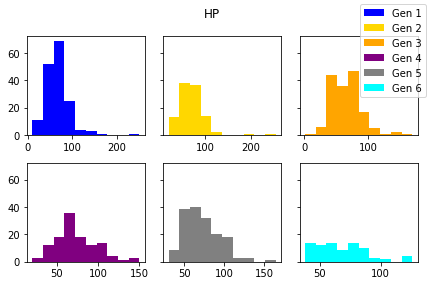

In [29]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
fig.suptitle('HP')
axs[0][0].hist(gen_1['HP'], label='Gen 1', color='blue')
axs[0][1].hist(gen_2['HP'], label='Gen 2', color='gold')
axs[0][2].hist(gen_3['HP'], label='Gen 3', color='orange')
axs[1][0].hist(gen_4['HP'], label='Gen 4', color='purple')
axs[1][1].hist(gen_5['HP'], label='Gen 5', color='grey')
axs[1][2].hist(gen_6['HP'], label='Gen 6', color='cyan')
fig.legend()
fig.savefig('images/hp_compare.jpg')

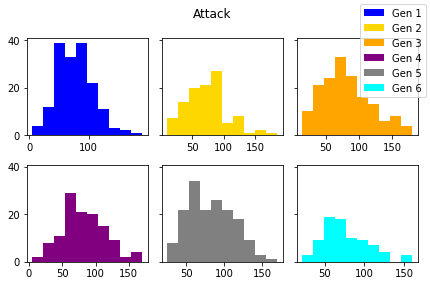

In [30]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
fig.suptitle('Attack')
axs[0][0].hist(gen_1['Attack'], label='Gen 1', color='blue')
axs[0][1].hist(gen_2['Attack'], label='Gen 2', color='gold')
axs[0][2].hist(gen_3['Attack'], label='Gen 3', color='orange')
axs[1][0].hist(gen_4['Attack'], label='Gen 4', color='purple')
axs[1][1].hist(gen_5['Attack'], label='Gen 5', color='grey')
axs[1][2].hist(gen_6['Attack'], label='Gen 6', color='cyan')
fig.legend()
fig.savefig('images/attack_compare.jpg')

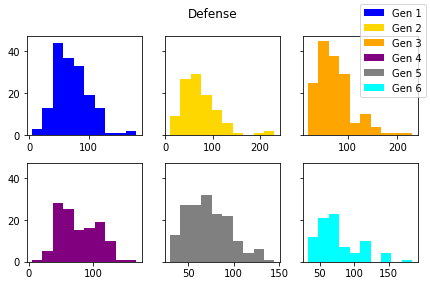

In [31]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
fig.suptitle('Defense')
axs[0][0].hist(gen_1['Defense'], label='Gen 1', color='blue')
axs[0][1].hist(gen_2['Defense'], label='Gen 2', color='gold')
axs[0][2].hist(gen_3['Defense'], label='Gen 3', color='orange')
axs[1][0].hist(gen_4['Defense'], label='Gen 4', color='purple')
axs[1][1].hist(gen_5['Defense'], label='Gen 5', color='grey')
axs[1][2].hist(gen_6['Defense'], label='Gen 6', color='cyan')
fig.legend()
fig.savefig('images/defense_compare.jpg')

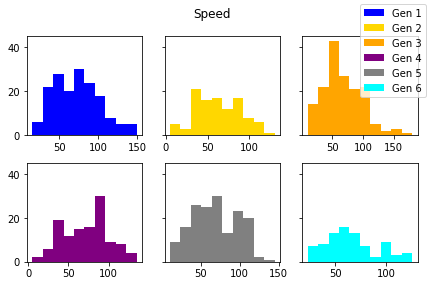

In [32]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
fig.suptitle('Speed')
axs[0][0].hist(gen_1['Speed'], label='Gen 1', color='blue')
axs[0][1].hist(gen_2['Speed'], label='Gen 2', color='gold')
axs[0][2].hist(gen_3['Speed'], label='Gen 3', color='orange')
axs[1][0].hist(gen_4['Speed'], label='Gen 4', color='purple')
axs[1][1].hist(gen_5['Speed'], label='Gen 5', color='grey')
axs[1][2].hist(gen_6['Speed'], label='Gen 6', color='cyan')
fig.legend()
fig.savefig('images/speed_compare.jpg')

When comparing the histogram charts of different Pokèmon stats you can notice a strange behavior that Gens 1, 3, and 5 have
similar distributions and 2, 4, and 6 have similar distributions. This is interesting because it also looks like Gen 1, 3, and
5 have a higher top bin than on most stats. This would mean that more of the Pokèmon have lower stats, but the max
stats for the generation are higher.

For Gens 2, 4, and 6 we can notice that the distribution is more even throughout the stats but the max stats for these gens
are lower than the other generations.

Now I want to compare the mean stats for each generation.

In [33]:
poke_means = poke_df.groupby('Generation').mean(numeric_only=True)
poke_means.drop(columns=['#', 'Legendary'], inplace=True)
poke_means.head(6)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,
1,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
6,436.378049,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


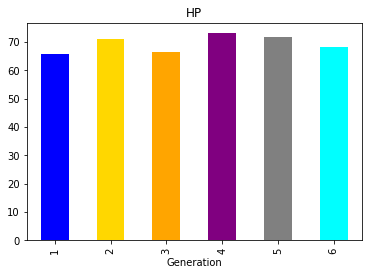

In [34]:
fig = poke_means.plot.bar(y='HP', color=['blue', 'gold', 'orange', 'purple', 'grey', 'cyan'], legend=False, title='HP').get_figure()
fig.savefig('images/hp_means.jpg')

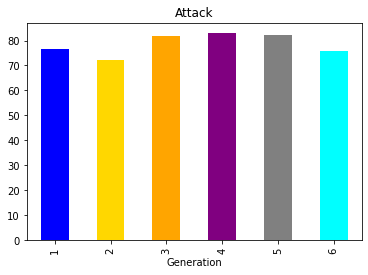

In [35]:
fig = poke_means.plot.bar(y='Attack', color=['blue', 'gold', 'orange', 'purple', 'grey', 'cyan'], legend=False, title='Attack').get_figure()
fig.savefig('images/attack_means.jpg')

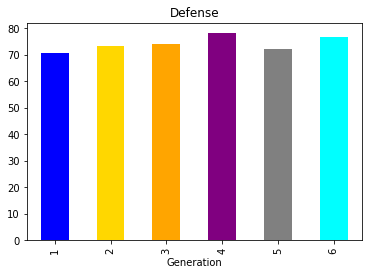

In [36]:
fig = poke_means.plot.bar(y='Defense', color=['blue', 'gold', 'orange', 'purple', 'grey', 'cyan'], legend=False, title='Defense').get_figure()
fig.savefig('images/defense_means.jpg')

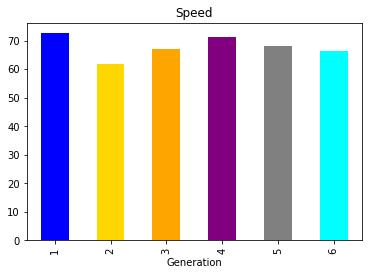

In [37]:
fig = poke_means.plot.bar(y='Speed', color=['blue', 'gold', 'orange', 'purple', 'grey', 'cyan'], legend=False, title='Speed').get_figure()
fig.savefig('images/speed_means.jpg')

From the above charts were I compared the mean of each stat per generation we can see that there isn't as much
of a pattern as we saw with the histograms. This shows that even though the histograms are off that there are
just a few outliers in each generation but the majority of Pokèmon have similar stats across generations.


This next chart is going to look a little crazy but stick with me.

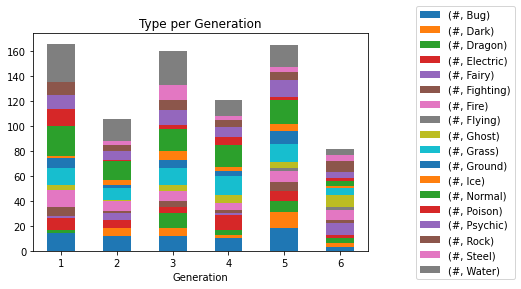

In [38]:
gen_type = poke_df.groupby(['Generation', 'Type 1']).count().filter('#').unstack('Type 1')
fig = gen_type.plot(kind='bar', stacked=True, legend=False, rot=0, title='Type per Generation').get_figure()
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.savefig('images/type_per_gen.jpg')

I warned you this chart was going to look a little crazy, but we can notice some interesting things from this chart.
We notice the same correlation pattern between Gens 1, 3, and 5 having, in some cases significantly, more Pokèmon
than the other generations. Knowing this, we can revisit some of the earlier charts we generated with a little more
context.

## SKLEARN time!! 🎉

In this section I'm wanting to try to use sklearn to try to cluster and/or classify the data.

### Classification

In [39]:
sk_df = poke_df.drop(columns=['#', 'Type 2', 'Legendary', 'Name'], axis=1)
sk_df.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Grass,318,45,49,49,65,65,45,1
1,Grass,405,60,62,63,80,80,60,1
2,Grass,525,80,82,83,100,100,80,1
3,Grass,625,80,100,123,122,120,80,1
4,Fire,309,39,52,43,60,50,65,1


In [40]:
types = list(sk_df['Type 1'].unique())
type_mapping = {}
for x in range(len(types)):
    type_mapping[types[x]] = x
sk_df['Type 1'] = sk_df['Type 1'].map(type_mapping)
sk_df.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,0,318,45,49,49,65,65,45,1
1,0,405,60,62,63,80,80,60,1
2,0,525,80,82,83,100,100,80,1
3,0,625,80,100,123,122,120,80,1
4,1,309,39,52,43,60,50,65,1


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test= train_test_split(sk_df)

train_types = x_train['Type 1']
del x_train['Type 1']

test_types = x_test['Type 1']
del x_test['Type 1']

#### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(x_train, train_types)
rf_score = clf.score(x_test, test_types)
print(f'Score: {rf_score}')

Score: 0.245


#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=10000).fit(x_train, train_types)
lr_score = clf.score(x_test, test_types)
print(f'Score: {lr_score}')

Score: 0.2


#### Linear Support Vector Classification

In [44]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0))
clf.fit(x_train, train_types)
svc_score = clf.score(x_test, test_types)
print(f'Score: {svc_score}')

Score: 0.2


/Users/thomas/.virtualenvs/notebook/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Clustering

#### K Means

In [67]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=10, random_state=0).fit(x_train.values)
y_pred = y_pred.predict(x_test.values)
y_pred

array([2, 8, 4, 3, 4, 2, 9, 1, 2, 3, 7, 2, 3, 2, 8, 7, 5, 7, 8, 9, 9, 9,
       0, 5, 7, 0, 3, 5, 6, 5, 5, 2, 1, 2, 9, 7, 6, 5, 9, 3, 9, 2, 0, 1,
       7, 8, 8, 2, 8, 2, 0, 4, 3, 3, 9, 0, 0, 9, 9, 0, 9, 8, 7, 3, 3, 1,
       8, 9, 7, 0, 8, 2, 9, 1, 7, 5, 1, 7, 5, 7, 7, 3, 5, 8, 1, 9, 3, 3,
       0, 8, 3, 7, 9, 3, 8, 7, 1, 8, 9, 1, 7, 4, 9, 2, 2, 0, 7, 3, 8, 7,
       1, 1, 5, 0, 5, 8, 8, 0, 8, 5, 7, 9, 5, 3, 3, 3, 5, 0, 7, 3, 5, 8,
       7, 3, 5, 9, 3, 0, 9, 4, 1, 3, 3, 5, 7, 1, 3, 8, 1, 2, 3, 6, 3, 0,
       1, 4, 3, 1, 5, 3, 3, 8, 3, 0, 1, 2, 7, 0, 1, 0, 3, 9, 9, 9, 7, 0,
       5, 5, 8, 5, 0, 9, 5, 9, 8, 0, 4, 0, 4, 8, 7, 8, 8, 3, 7, 7, 9, 3,
       0, 1], dtype=int32)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

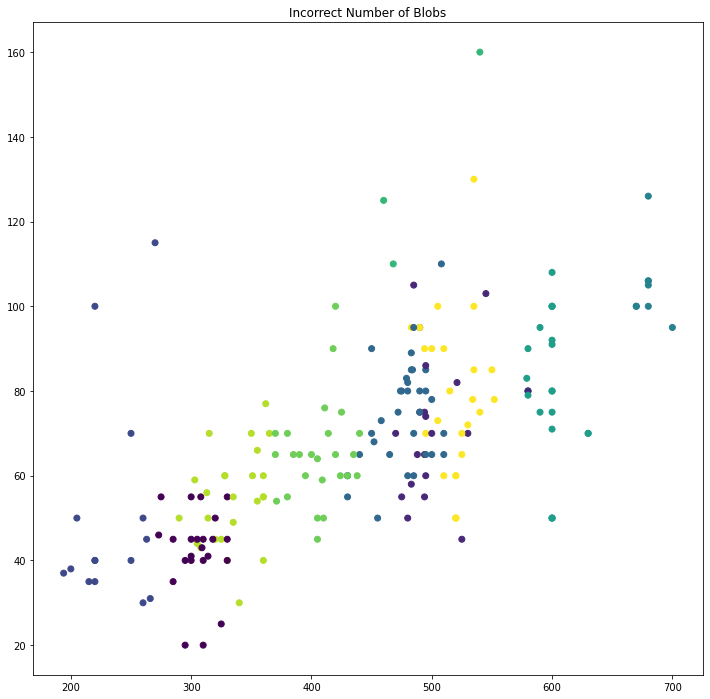

In [69]:
plt.figure(figsize=(12, 12))
x = x_test.values
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")